In [15]:
import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
import requests
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('yelp_dataset_combined.csv')

In [17]:
df

,date,user_id,user_name,gender,user_ages,user_address,friends,review_count_users,business_id,business_name,business_address,service_name,review_count_business,review_id,stars,state,average_stars,rec_score,q_responses
0,2015-01-04 00:01:03,_7bHUi9Uuf5__HHc_Q8guQ,Henry,M,56,"-1.1798412, 30.2108673","FwQAVsfSNegsv3DgOYfaAr, Xkr0Q8ww1EIJbeSCdexvHQ",196.0,kxX2SOes4o-D3ZQBkiMRfA,Green Store,"-1.9740000, 28.9016660",Indian restaurant,304.0,AqPFMleE6RsU23_auESxiA,4.1,1,3.81,10,1
1,2015-09-23 23:10:31,eUta8W_HdHMXPzLBBZhL1A,Bob,M,35,"-2.6917461, 29.3530892","mWccGud0H2xrTDzBFXiu1A, OthHXGig6G1WOyirhuUdIU...",196.0,04UD14gamNjLY0IDYVhHJg,Big Store,"-1.8571284, 30.1854281",Take out,304.0,JrIxlS1TzJ-iCu79ul40cQ,4.1,3,3.81,2,1
2,2009-10-14 19:57:14,smOvOajNG0lS4Pq7d8g4JQ,Meg,F,35,"-2.15470501197638, 30.79984024874511","_BcWyKQL16ndpBdggh2kNA, 6Mv-qMJyxSokCu8YFM1o0A...",176.0,RZtGWDLCAtuipwaZ-UfjmQ,Silver Diner,"-2.2472536, 30.2478109",Restaurant service,304.0,8JFGBuHMoiNDyfcxuWNtrA,4.1,2,3.46,7,1
3,2014-11-12 15:30:27,IQsF3Rc6IgCzjVV9DE8KXg,Dana,F,30,"-1.7674773060963864, 30.41505699108125","YTDadrj2g1BrGsxcyQ0Kew, CKf0U33HQlUIG62yufzH7A...",182.0,eFvzHawVJofxSnD7TgbZtg,Little Hotel,"-2.2821203, 30.0538868",Coffee shop,304.0,Xs8Z8lmKkosqW5mw_sVAoA,4.1,1,3.41,10,1
4,2012-12-04 16:46:20,vrKkXsozqqecF3CW4cGaVQ,Mike,M,25,"-2.3275867468285774, 29.54905002869698","ZaUT63HFjheiub1y7019Yg, Obkepp5aBTYVX-AL4zwBoQ...",120.0,rjuWz_AD3WfXJc03AhIO_w,Fire and Stone Pizza Company,"-1.951758, 30.080935",Comedy club,51.0,J-4NdnDZ0pUQaUEEwDI9KQ,4.8,1,4.44,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,2016-01-17 15:14:46,rItnJdV5VxRM8UxGTpCFRg,Frank,M,43,"-2.8353723, 29.4332361","DIzZeEC1MfMl9hLiu53qBI, a2gFihpZ042oNcyOTa6k7c...",196.0,JomDoQafikclSVVCPkWjnA,Shokola Café,"-1.9346636, 30.0788338",Restaurant service,333.0,T6zRlPDjfHx4itPEY9Xdmg,4.3,1,3.81,9,1
1105,2015-10-23 14:09:13,qBXmpgTLsgqgxaXkk9tYGQ,Charlie,M,22,"-2.3425951, 29.6986449",9UefhvIlQjWBPfcjAqI9O3,196.0,X5fWO9e82EICHXzzs6eQMg,diva house beauty,"-1.9753742, 30.1050215",Facial service,1.0,nbelKTcXooUHzph_JyCTUw,5.0,1,3.81,10,1
1106,2009-10-13 23:41:18,I8QnlSLVGLSa3oIBfwDYIQ,Rachel,F,45,"-1.5577970514603232, 29.48588433417057","liTPJZ-JmFt5VgG1f1SmQw, y8aWXOimQ9ZgUgZ6q--nCQ...",36.0,7lwe7n-Yc-V9E_HfLAeylg,Trattoria Restaurant and Bar,"-1.9479742, 30.0786057",Fine dining,131.0,kNnrNzvedtCMNBx90BZW6A,3.6,3,3.81,3,-1
1107,2017-06-18 00:47:27,sBpfhbdycWly1i5B4XBBsg,Alice,M,63,"-2.0103151, 29.8407574","yMlqL30aZEj8hR7zYskKGL, GyT2GLjzJ3Dgw8nkfTduSv...",196.0,qjGS_7iaQDpbVhS6W8qkHQ,Dream Travel Agency Ltd,"-1.9416875, 30.0589375",Dessert shop,1.0,AnL9XbU8NLCWtndf3Idtmw,5.0,1,3.81,10,1


In [18]:
# import random
# import csv
# from faker import Faker

# # Initialize Faker for generating realistic data
# fake = Faker()

# # Set random seed for reproducibility
# random.seed(42)

# # Define Rwanda's bounding box
# RWANDA_MIN_LAT, RWANDA_MAX_LAT = -2.8, -1.0
# RWANDA_MIN_LON, RWANDA_MAX_LON = 28.8, 30.9

# # Define lists for various fields
# institutions = ['Bank of Kigali', 'MTN Rwanda', 'Rwanda Energy Group', 'Urwego Bank', 'RwandAir', 'Equity Bank Rwanda', 'I&M Bank Rwanda', 'Cogebanque', 'KCB Bank Rwanda', 'African Alliance Rwanda']
# institution_categories = ['Banking', 'Telecommunications', 'Energy', 'Microfinance', 'Aviation', 'Insurance', 'Retail', 'Education', 'Healthcare', 'Agriculture']
# services = ['Savings Accounts', 'Mobile Money', 'Electricity Distribution', 'Microloans', 'Flight Bookings', 'Internet Services', 'Money Transfer', 'Credit Cards', 'Insurance Policies', 'Agricultural Loans']

# def generate_rwanda_coordinates():
#     lat = random.uniform(RWANDA_MIN_LAT, RWANDA_MAX_LAT)
#     lon = random.uniform(RWANDA_MIN_LON, RWANDA_MAX_LON)
#     return f"{lat:.6f}, {lon:.6f}"

# def generate_dataset(num_records):
#     dataset = []
#     for _ in range(num_records):
#         record = {
#             'userid': f'{random.randint(1000, 9999):04d}',
#             'user_age': random.randint(12, 60),
#             'user_address': generate_rwanda_coordinates(),
#             'user_gender': random.choice(['male', 'female']),
#             'institution_name': random.choice(institutions),
#             'institution_branch': f'{fake.word().capitalize()} Branch',
#             'services': random.choice(services),
#             'institution_address': generate_rwanda_coordinates(),
#             'institution_category': random.choice(institution_categories),
#             'reviews': random.randint(1, 5),
#             'recommendus_score': random.randint(1, 10),
#             'how_did_we_serve_you': random.choice(['good', 'excellent', 'bad'])
#         }
#         dataset.append(record)
#     return dataset

# def save_to_csv(dataset, filename):
#     keys = dataset[0].keys()
#     with open(filename, 'w', newline='') as output_file:
#         dict_writer = csv.DictWriter(output_file, keys)
#         dict_writer.writeheader()
#         dict_writer.writerows(dataset)

# # Generate 100 records
# num_records = 100
# dataset = generate_dataset(num_records)

# # Save to CSV
# save_to_csv(dataset, 'the_simulated_dataset.csv')

# print(f"Dataset with {num_records} records has been generated and saved to 'simulated_dataset.csv'")

## analysis

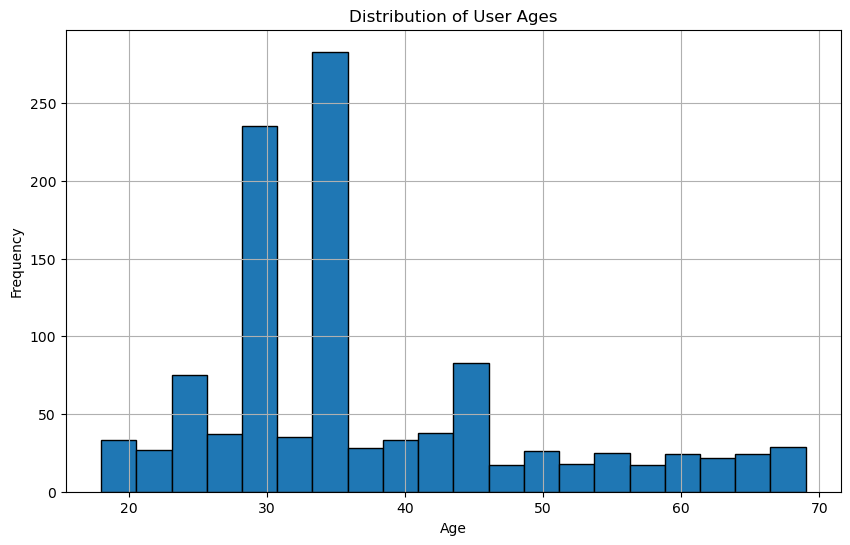

In [19]:
# Age Distribution Analysis
plt.figure(figsize=(10, 6))
df['user_ages'].hist(bins=20, edgecolor='black')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Calculate age statistics
age_stats = df['user_ages'].describe()
print("Age Statistics:")
print(age_stats)

Age Statistics:
count    1109.000000
mean       37.495041
std        11.644758
min        18.000000
25%        30.000000
50%        35.000000
75%        45.000000
max        69.000000
Name: user_ages, dtype: float64


In [21]:
# Gender Analysis
gender_counts = df['gender'].value_counts()
gender_percentages = gender_counts / len(df) * 100

print("\nGender Distribution:")
for gender, percentage in gender_percentages.items():
    print(f"{gender}: {percentage:.2f}%")


Gender Distribution:
M: 61.50%
F: 28.22%
N: 10.28%


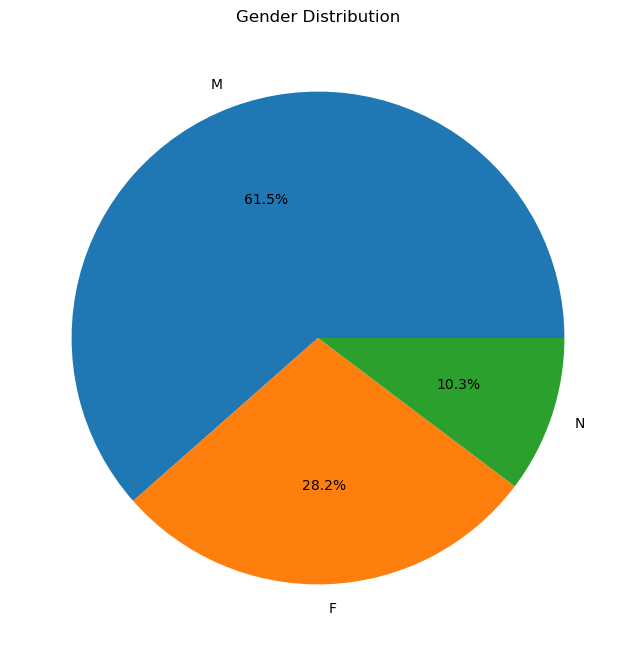

In [22]:
# Visualize Gender Distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

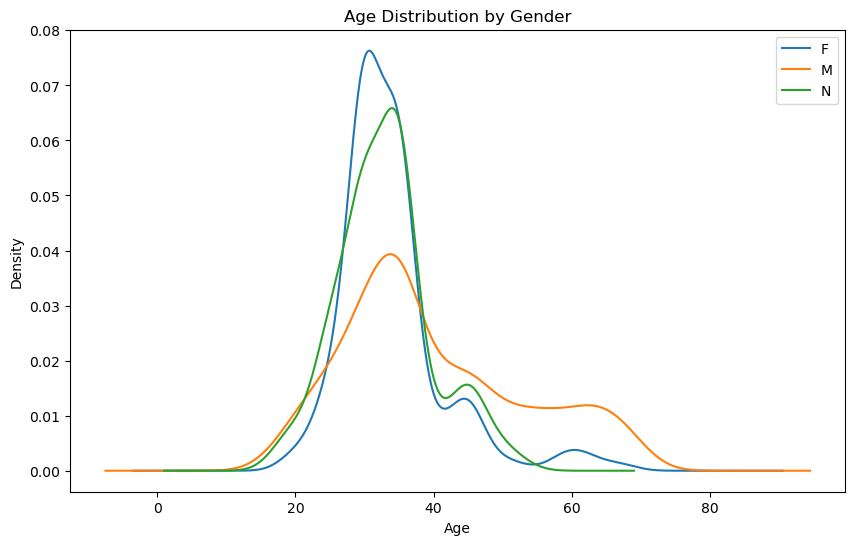

In [23]:
# Age distribution by gender
plt.figure(figsize=(10, 6))
df.groupby('gender')['user_ages'].plot(kind='kde', legend=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [24]:
# Function to extract latitude and longitude from the address string
def extract_lat_lon(address):
    lat, lon = map(float, address.split(','))
    return lat, lon

# Apply the function to create separate latitude and longitude columns
df['latitude'], df['longitude'] = zip(*df['user_address'].apply(extract_lat_lon))

# Create a map centered on Rwanda
rwanda_center = [-1.94, 29.87]
m = folium.Map(location=rwanda_center, zoom_start=8)

# Add markers for each user
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"User name: {row['user_name']}, Age: {row['user_ages']}, Gender: {row['gender']}",
        color="#3186cc",
        fill=True,
        fill_color="#3186cc"
    ).add_to(m)

# Save the map
m.save("rwanda_user_map222222222222.html")

print("Map has been generated and saved as 'rwanda_user_map.html'")

Map has been generated and saved as 'rwanda_user_map.html'


In [25]:
# Extract latitude and longitude
df[['latitude', 'longitude']] = df['user_address'].str.split(',', expand=True).astype(float)

In [26]:
# 1. Identify clusters or hotspots of user activity
# We'll use K-means clustering for this
coords = df[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(coords)

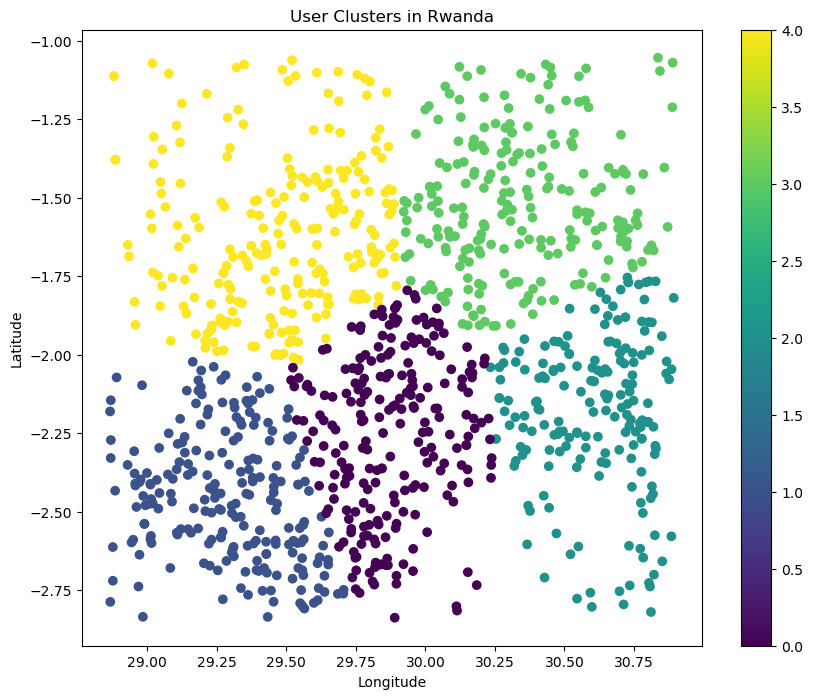

In [27]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('User Clusters in Rwanda')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

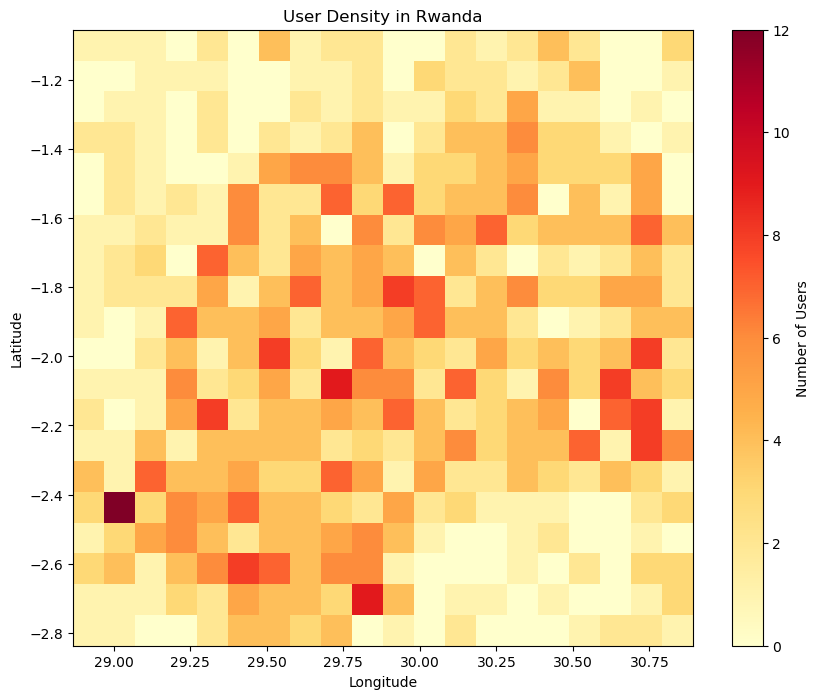

In [28]:
# 2. Calculate the density of users in different regions
# We'll use a 2D histogram for this
plt.figure(figsize=(10, 8))
plt.hist2d(df['longitude'], df['latitude'], bins=(20, 20), cmap='YlOrRd')
plt.colorbar(label='Number of Users')
plt.title('User Density in Rwanda')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [29]:
df.columns

Index(['date', 'user_id', 'user_name', 'gender', 'user_ages', 'user_address',
       'friends', 'review_count_users', 'business_id', 'business_name',
       'business_address', 'service_name', 'review_count_business',
       'review_id', 'stars', 'state', 'average_stars', 'rec_score',
       'q_responses', 'latitude', 'longitude', 'cluster'],
      dtype='object')

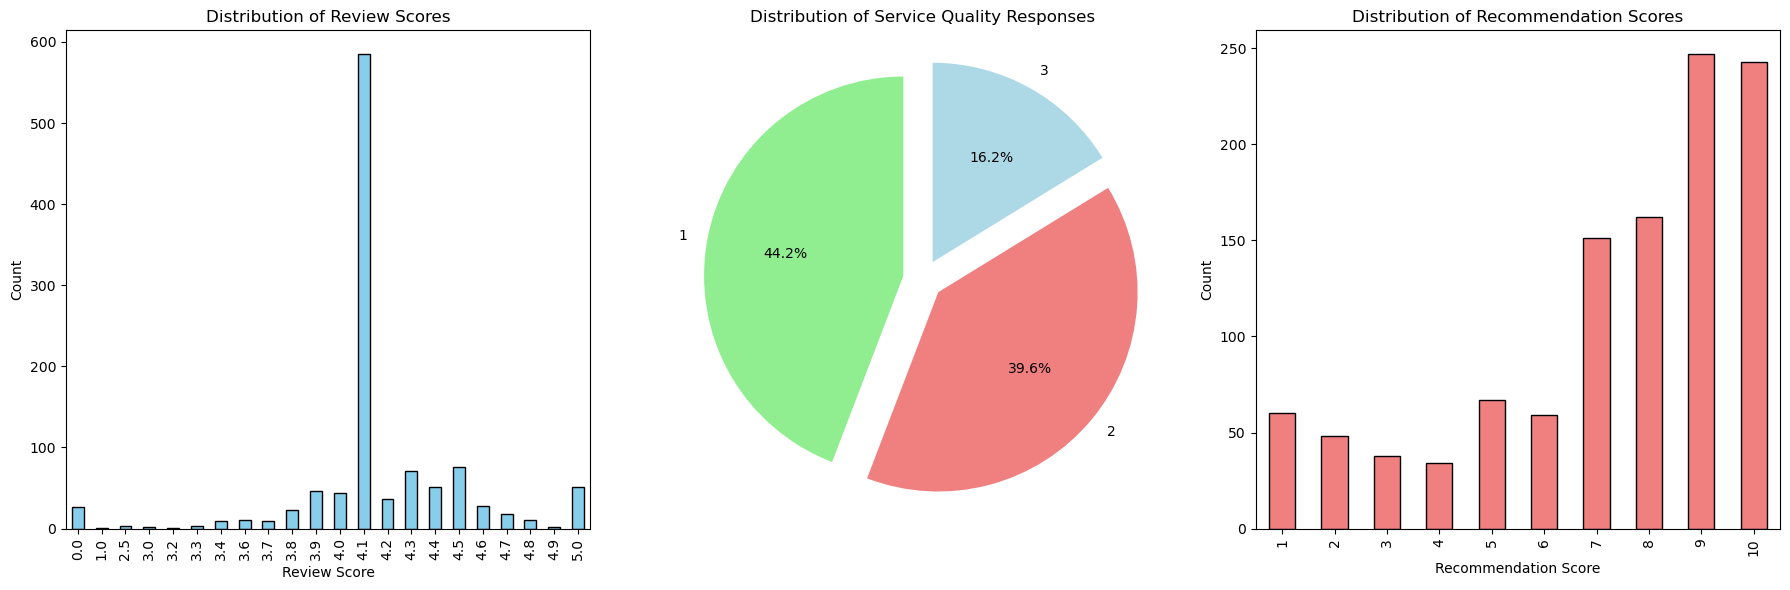

In [30]:
plt.figure(figsize=(18, 6))

# Distribution of Review Scores
plt.subplot(1, 3, 1)
df['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')

# Distribution of Service Quality Responses
plt.subplot(1, 3, 2)
df['state'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'], startangle=90, explode=[0.1]*df['state'].nunique())
plt.title('Distribution of Service Quality Responses')
plt.ylabel('')  # Hide y-label for pie chart

# Distribution of Recommendation Scores
plt.subplot(1, 3, 3)
df['rec_score'].value_counts().sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution of Recommendation Scores')
plt.xlabel('Recommendation Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

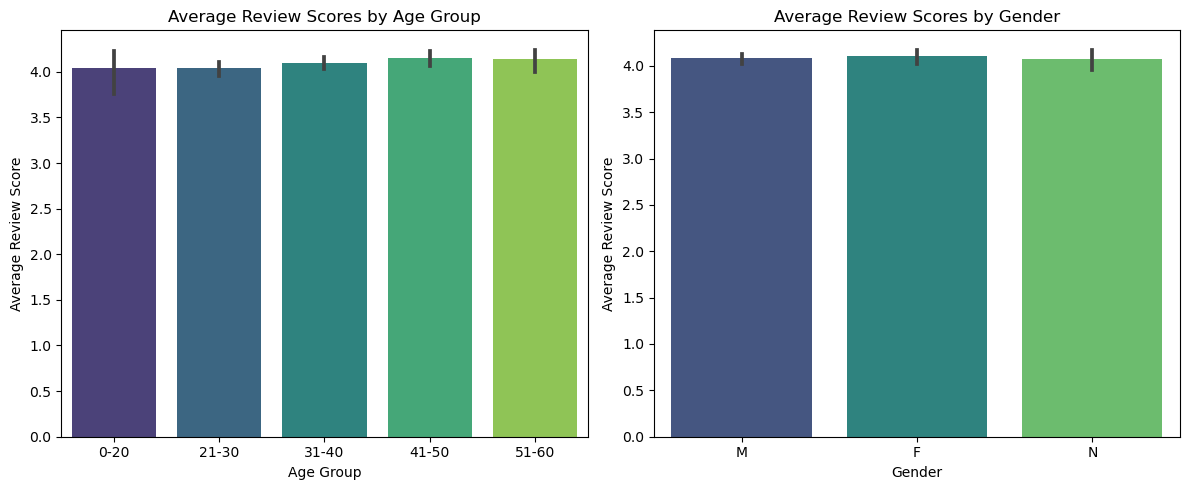

In [31]:
# Create age bins
age_bins = [0, 20, 30, 40, 50, 60]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60']
df['age_group'] = pd.cut(df['user_ages'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(12, 5))

# Bar plot for Age Group vs Review Score
plt.subplot(1, 2, 1)
sns.barplot(x='age_group', y='stars', data=df, palette='viridis')
plt.title('Average Review Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Review Score')

# Bar plot for Gender vs Review Score
plt.subplot(1, 2, 2)
sns.barplot(x='gender', y='stars', data=df, palette='viridis')
plt.title('Average Review Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Review Score')

plt.tight_layout()
plt.show()


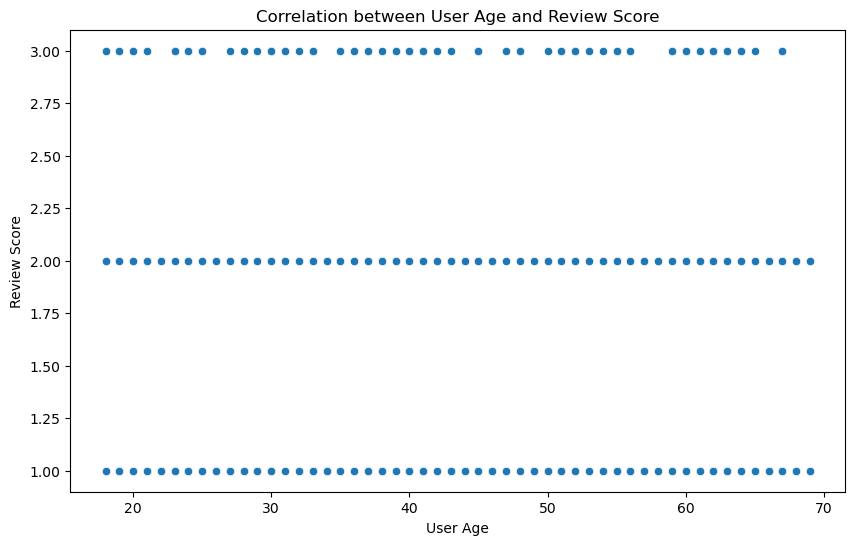

In [32]:
# 5. Identify any correlation between user age and satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_ages', y='state', data=df)
plt.title('Correlation between User Age and Review Score')
plt.xlabel('User Age')
plt.ylabel('Review Score')
plt.show()

In [33]:
# Calculate correlation coefficient
correlation1 = df['user_ages'].corr(df['state'])
correlation2 = df['user_ages'].corr(df['stars'])
correlation3 = df['user_ages'].corr(df['rec_score'])
correlation4 = df['user_ages'].corr(df['q_responses'])
print(f"Correlation between user age and state: {correlation1:.2f}")
print(f"Correlation between user age and stars: {correlation2:.2f}")
print(f"Correlation between user age and rec_score: {correlation3:.2f}")
print(f"Correlation between user age and q_responses: {correlation4:.2f}")

Correlation between user age and state: 0.02
Correlation between user age and stars: 0.03
Correlation between user age and rec_score: -0.04
Correlation between user age and q_responses: -0.02


In [37]:
# 4. Compare satisfaction levels across different age groups or genders
age_bins = [0, 20, 30, 40, 50, 60]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60']
df['age_group'] = pd.cut(df['user_ages'], bins=age_bins, labels=age_labels, include_lowest=True)

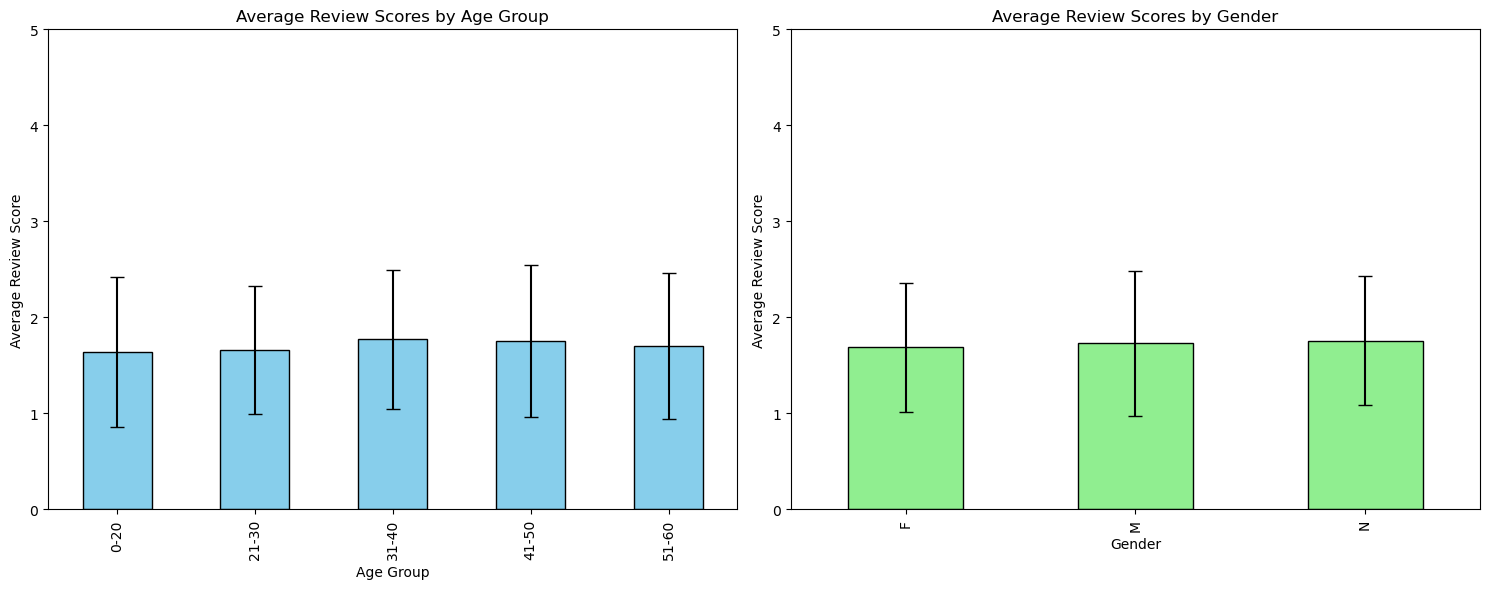

In [38]:
plt.figure(figsize=(15, 6))

# Age Group Analysis
plt.subplot(1, 2, 1)
age_group_stats = df.groupby('age_group')['state'].agg(['mean', 'std'])
age_group_stats.plot(kind='bar', y='mean', yerr='std', ax=plt.gca(), capsize=5, color='skyblue', edgecolor='black')
plt.title('Average Review Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Review Score')
plt.ylim(0, 5)  # Assuming review scores are from 1 to 5
plt.legend().remove()

# Gender Analysis
plt.subplot(1, 2, 2)
gender_stats = df.groupby('gender')['state'].agg(['mean', 'std'])
gender_stats.plot(kind='bar', y='mean', yerr='std', ax=plt.gca(), capsize=5, color='lightgreen', edgecolor='black')
plt.title('Average Review Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Review Score')
plt.ylim(0, 5)  # Assuming review scores are from 1 to 5
plt.legend().remove()

plt.tight_layout()
# plt.savefig('satisfaction_by_age_and_gender.png')
plt.show()

# print("Satisfaction comparison graph has been saved as 'satisfaction_by_age_and_gender.png'")

#recommandation

In [ ]:
# Create age groups
df['age_group'] = pd.cut(df['user_ages'], bins=[0, 20, 30, 40, 50, 60], labels=['0-20', '21-30', '31-40', '41-50', '51-60'])

# Cluster locations
coords = df[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=5, random_state=42)
df['location_cluster'] = kmeans.fit_predict(coords)

# Function to get top services for a group
def get_top_services(group, n=3):
    return group['service_name'].value_counts().nlargest(n).index.tolist()

# Group data and get top services for each group
grouped = df.groupby(['age_group', 'gender', 'location_cluster'])
top_services = grouped.apply(get_top_services).reset_index()
top_services.columns = ['age_group', 'gender', 'location_cluster', 'top_services']

# Function to recommend services
def recommend_services(age, gender, lat, lon):
    age_group = pd.cut([age], bins=[0, 20, 30, 40, 50, 60], labels=['0-20', '21-30', '31-40', '41-50', '51-60'])[0]
    location_cluster = kmeans.predict([[lat, lon]])[0]
    
    recommendations = top_services[
        (top_services['age_group'] == age_group) & 
        (top_services['gender'] == gender) & 
        (top_services['location_cluster'] == location_cluster)
    ]['top_services']
    
    if not recommendations.empty:
        return recommendations.iloc[0]
    else:
        return top_services['top_services'].iloc[0]  # Return overall top services if no match

# Example usage
print(recommend_services(25, 'female', -1.9441, 30.0619))

# Function to get recommendations for all users
def get_all_recommendations(df):
    df['recommended_services'] = df.apply(lambda row: recommend_services(
        row['user_ages'], row['gender'], row['latitude'], row['longitude']), axis=1)
    return df

# Get recommendations for all users
df_with_recommendations = get_all_recommendations(df)

# # Print a sample of users with their recommended services
# print(df_with_recommendations[['user_name', 'user_ages', 'gender', 'user_address', 'recommended_services']].head(10))

# # Save the results
# df_with_recommendations.to_csv('users_with_recommendations.csv', index=False)
# print("Recommendations have been saved to 'users_with_recommendations.csv'")

['Noodle bar']


In [ ]:
top_services